sourse for code: https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Iterate through directories or join paths
import os
import cv2

# mount google drive locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Specify data directory and read the images into an array

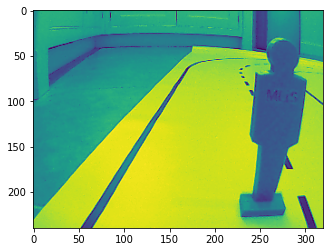

In [ ]:
directory = '/content/drive/My Drive/AutonomousDriving/training_data/training_data'

#check one image
for image in os.listdir(directory):
  image_array = cv2.imread(os.path.join(directory,image), cv2.IMREAD_GRAYSCALE)
  plt.imshow(image_array)
  plt.show()
  break

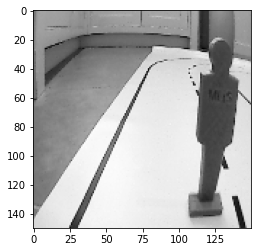

In [ ]:
#Scale
IMG_SIZE = 150

new_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

Import the training dataset labels as a pandas dataframe

In [ ]:
import pandas as pd
df_train_labels = pd.read_csv('/content/drive/My Drive/AutonomousDriving/training_norm.csv')
df_train_labels.head(5)

,image_id,angle,speed
0,1,0.4375,0.0
1,2,0.8125,1.0
2,3,0.4375,1.0
3,4,0.6250,1.0
4,5,0.5000,0.0


Read training data (Note that rescaling will be applied after the data are stored as pickle to allow extra flexibility during training, so not in this file!)

In [ ]:
image_train = []
count = 0
directory = '/content/drive/My Drive/AutonomousDriving/training_data/training_data'

for image in os.listdir(directory):
  image_array = cv2.imread(os.path.join(directory,image),cv2.IMREAD_GRAYSCALE)

  # Exlude any images that return noneType error (only five were identified)
  if np.count_nonzero(pd.isnull(image_array)): 
    print("NA: This image was not read well so we will skip for now")
  else:
    # resize to 150 x 150
    new_image_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
    image_train.append([new_image_array, df_train_labels.iloc[count][1], df_train_labels.iloc[count][2]])

  count +=1
  if count%100 == 0:
    print(count)

100
200
300
400
500
600
700
800
900
1000
1100
NA: This image was not read well so we will skip for now
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
NA: This image was not read well so we will skip for now
5600
5700
5800
5900
6000
6100
6200
6300
NA: This image was not read well so we will skip for now
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
NA: This image was not read well so we will skip for now
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
NA: This image was not read well so we will skip for now
13300
13400
13500
13600
13700


In [ ]:
print(len(image_train))


print(image_train[12300])
print(df_train_labels.iloc[12304][1])

13793
[array([[231, 219, 208, ..., 183, 171, 183],
       [230, 219, 207, ..., 184, 172, 187],
       [227, 215, 207, ..., 184, 163, 190],
       ...,
       [151, 152, 153, ..., 204, 204, 203],
       [148, 148, 151, ..., 203, 203, 203],
       [146, 146, 148, ..., 203, 201, 203]], dtype=uint8), 0.3125, 1.0]
0.3125


Serialization, Pickle it

In [ ]:
import pickle

# With allows to automatically close the file
#with open('/content/drive/My Drive/AutonomousDriving/train.pickle', 'wb') as ff:
with open('/content/drive/My Drive/AutonomousDriving/trainGrayScaled.pickle', 'wb') as ff:
  pickle.dump(image_train, ff)

Read test data 

In [5]:
image_test = []
count = 0
directory_test = '/content/drive/My Drive/AutonomousDriving/test_data/test_data'
IMG_SIZE = 150

for image in os.listdir(directory_test):
  image_array = cv2.imread(os.path.join(directory_test,image),cv2.IMREAD_GRAYSCALE)

  # Exlude any images that return noneType error
  if np.count_nonzero(pd.isnull(image_array)): 
    print("NA: This image was not read well")
    print("count"+count)
  else:
    # resize to 150 x 150
    new_image_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
    image_test.append(new_image_array)

  count +=1
  if count%100 == 0:
    print(count)

100
200
300
400
500
600
700
800
900
1000


Test length of dataset is 1020

In [8]:
print(len(image_test))
print(image_test[0])

1020
[[ 70  77  42 ... 116 127  87]
 [ 40 133 141 ...  87  94  93]
 [121 121 118 ...  18  15  16]
 ...
 [228 229 229 ... 236 233 234]
 [228 228 229 ... 235 235 235]
 [228 227 221 ... 235 235 233]]


Serialize test dataset

In [9]:
import pickle

# With allows to automatically close the file
with open('/content/drive/My Drive/AutonomousDriving/testGrayScaled.pickle', 'wb') as ff:
  pickle.dump(image_test, ff)